# Pipelines in scikit-learn

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# standard syntax
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), SVC())

In [2]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))]

In [3]:
from sklearn.preprocessing import Normalizer
pipe = make_pipeline(MinMaxScaler(), Normalizer(), MinMaxScaler())
pipe.steps

[('minmaxscaler-1', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('normalizer', Normalizer(copy=True, norm='l2')),
 ('minmaxscaler-2', MinMaxScaler(copy=True, feature_range=(0, 1)))]

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# load and split the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
cancer.target, random_state=0)
pipe = make_pipeline(MinMaxScaler(), SVC())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.951048951048951

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100],
'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.9812206572769953
Test set score: 0.972027972027972
Best parameters: {'svc__C': 1, 'svc__gamma': 1}


In [8]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [9]:
grid.best_estimator_.named_steps

{'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'svc': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [11]:
grid.best_estimator_.named_steps["svc"]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
grid.best_estimator_.named_steps["svc"].n_support_

array([45, 40])

# The KFold class 

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
iris = load_iris()
svm = SVC()
cross_val_score(svm, iris.data, iris.target)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

array([0.98039216, 0.96078431, 0.97916667])

In [14]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=0)
kf

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


KFold(n_splits=3, random_state=0, shuffle=True)

In [16]:
kf.get_n_splits()

3

In [17]:
for rest_index, fold_index in kf.split(iris.data):
    #print("Current fold:", fold_index)
    #print("The rest of the training set:", rest_index)
    X_rest, X_fold = iris.data[rest_index], iris.data[fold_index]
    y_rest, y_fold = iris.target[rest_index], iris.target[fold_index]
    svm.fit(X_rest,y_rest)
    print(svm.score(X_fold,y_fold))

0.98
0.96
0.98


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Exercise 1

In [26]:
for rest_index, fold_index in kf.split(iris.data):
    print("Current fold:", fold_index)
    print("The rest of the training set:", rest_index)
    X_rest, X_fold = iris.data[rest_index], iris.data[fold_index]
    y_rest, y_fold = iris.target[rest_index], iris.target[fold_index]
    svm.fit(X_rest,y_rest)
    #print(svm.score(X_fold,y_fold))

Current fold: [  2   7   8  10  16  18  22  24  26  27  33  37  40  43  44  45  51  54
  59  60  61  62  63  66  71  73  76  78  83  84  86  90  92  93  97 100
 107 108 112 114 116 119 121 126 127 132 134 137 141 144]
The rest of the training set: [  0   1   3   4   5   6   9  11  12  13  14  15  17  19  20  21  23  25
  28  29  30  31  32  34  35  36  38  39  41  42  46  47  48  49  50  52
  53  55  56  57  58  64  65  67  68  69  70  72  74  75  77  79  80  81
  82  85  87  88  89  91  94  95  96  98  99 101 102 103 104 105 106 109
 110 111 113 115 117 118 120 122 123 124 125 128 129 130 131 133 135 136
 138 139 140 142 143 145 146 147 148 149]
Current fold: [  1   3   4   6  11  12  13  15  17  20  30  41  42  46  48  50  52  56
  64  68  69  80  85  89  91  94  95  96  98 101 102 104 106 109 110 111
 113 120 123 124 125 128 129 133 135 139 146 147 148 149]
The rest of the training set: [  0   2   5   7   8   9  10  14  16  18  19  21  22  23  24  25  26  27
  28  29  31  32  33  34

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The current folds have approximately equal sizes each time and they are complement to corresponding training sets. They look random but are actually complements to other sets.

# 3. Multiclass classification using SVC

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=6, test_size=None, random_state=0)
svm = SVC()
svm.fit(X_train, y_train)
svm.decision_function(X_test[0:2])

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[-0.34066345,  0.84066345,  2.5       ],
       [-0.31578545,  2.22555261,  1.09023284]])

In [21]:
y_test[0:2]

array([2, 1])

# 4. Validity of a conformal predictor

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.7, random_state=0)

In [32]:
import math
import numpy as np
def dist(x1, x2):
    return np.linalg.norm(x1-x2)
n_train = X_train.shape[0]
n_test = X_test.shape[0]
dist_own = math.inf * np.ones(n_train)
dist_other = math.inf * np.ones(n_train)
for i in range(n_train-1):
    for j in range(i+1,n_train):
        current_dist = dist(X_train[i],X_train[j])
    if y_train[i]==y_train[j]:
      if (current_dist < dist_own[i]):
        dist_own[i] = current_dist
      if (current_dist < dist_own[j]):
        dist_own[j] = current_dist
    else:
      if (current_dist < dist_other[i]):
        dist_other[i] = current_dist
      if (current_dist < dist_other[j]):
        dist_other[j] = current_dist

In [33]:
score = np.zeros(n_train+1)  
p = np.zeros((n_test,3))    
for j in range(n_test):
  for l in range(3):   
    aug_dist_own = np.append(dist_own,math.inf)
    aug_dist_other = np.append(dist_other,math.inf)
    for i in range(n_train):
      current_dist = dist(X_train[i],X_test[j])
      if y_train[i]==l:
        if (current_dist < aug_dist_own[i]):
          aug_dist_own[i] = current_dist
        if (current_dist < aug_dist_own[n_train]):
          aug_dist_own[n_train] = current_dist
      else:
        if (current_dist < aug_dist_other[i]):
          aug_dist_other[i] = current_dist
        if (current_dist < aug_dist_other[n_train]):
          aug_dist_other[n_train] = current_dist
    for i in range(n_train+1):
      if aug_dist_own[i] == 0:
        score[i] = math.inf
        if (aug_dist_other[i] == 0):
          score[i] = 0
      else:
        score[i] = aug_dist_other[i] / aug_dist_own[i]
    p[j,l] = np.mean(score<=score[n_train])

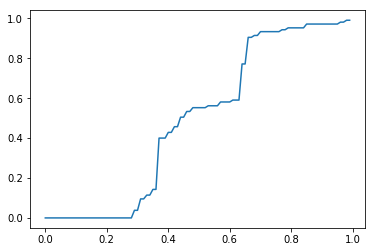

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
eps = np.zeros(100)  # a range of significance levels
err = np.zeros(100)  # the corresponding error rates
for k in range(100):
  eps[k] = k/100     # considering eps = k%
  err[k] = 0         # initializing the error rate
  for j in range(n_test):
    if (p[j,y_test[j]] <= eps[k]):  # if we made an error
      err[k] = err[k] + 1   # count this error
  err[k] = err[k] / n_test  # turn the number of errors into error rate
plt.plot(eps,err)

# Exercise 2

The calibration curve becomes more regular as test_size increases.  The dependence on random_state is heavy.